In [2]:
import tensorflow as tf

In [3]:
import pandas as pd
import numpy as np

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Downloads/Quality_inspection_ai_project/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [7]:
train_dir = "/content/drive/MyDrive/dataset/casting_data/casting_data/train"
test_dir = "/content/drive/MyDrive/dataset/casting_data/casting_data/test"

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [9]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32, 2)


In [10]:
# Check class names
class_names = train_data.class_indices
class_names = list(class_names.keys())
print(class_names)

['def_front', 'ok_front']


In [11]:
def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()

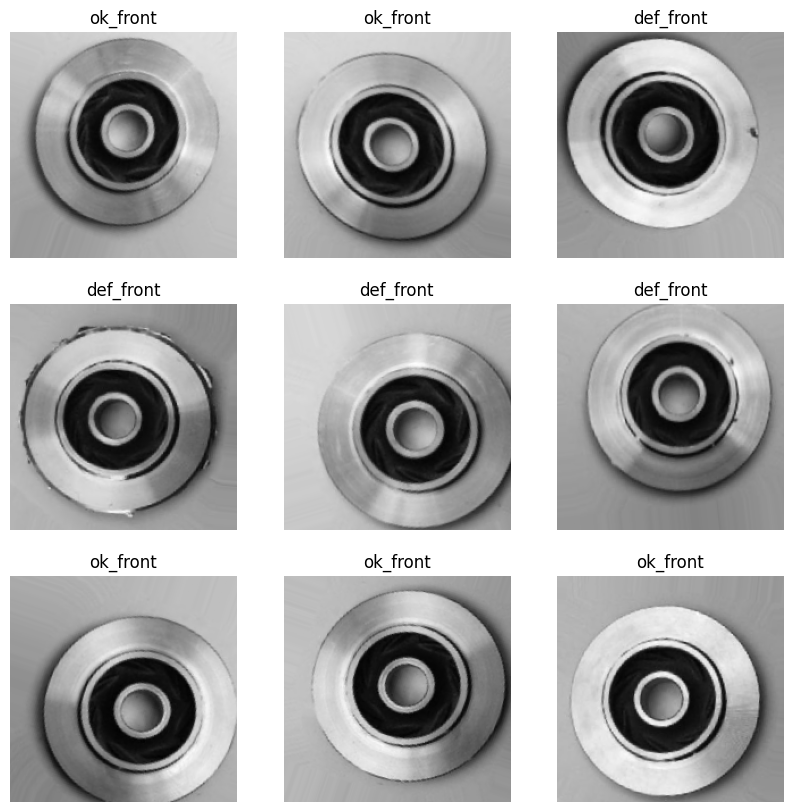

In [12]:
dataframe=sample_images(train_data, nrows=3, ncols=3)
dataframe

In [13]:
image_batch

array([[[[0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         ...,
         [0.83112   , 0.83112   , 0.83112   ],
         [0.82481337, 0.82481337, 0.82481337],
         [0.8309804 , 0.8309804 , 0.8309804 ]],

        [[0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         ...,
         [0.8283849 , 0.8283849 , 0.8283849 ],
         [0.82572514, 0.82572514, 0.82572514],
         [0.8337156 , 0.8337156 , 0.8337156 ]],

        [[0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.7490196 ],
         ...,
         [0.8256497 , 0.8256497 , 0.8256497 ],
         [0.82663685, 0.82663685, 0.82663685],
         [0.8364508 , 0.8364508 , 0.8364508 ]],

        ...,

        [[0.59607846, 0.59607846, 0.59607846],
         [0.59607846, 0.59607846, 0.59607846]

In [14]:
# Model layers
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(2 ,activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 199, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 49, 49, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0

In [17]:
# // original epoch - 20
history = model.fit(train_data,
                    epochs=2,
                    batch_size=32,
                    )

Epoch 1/2
208/208 [==============================] - 610s 3s/step - loss: 0.6825 - accuracy: 0.6160
Epoch 2/2
208/208 [==============================] - 644s 3s/step - loss: 0.5033 - accuracy: 0.7518


In [18]:
def plot_history(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()

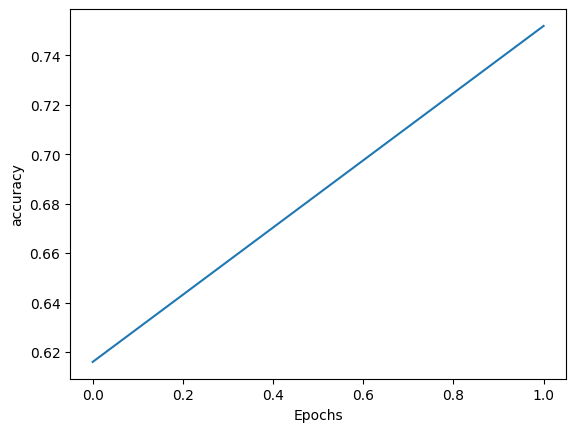

In [19]:
plot_history(history, 'accuracy')

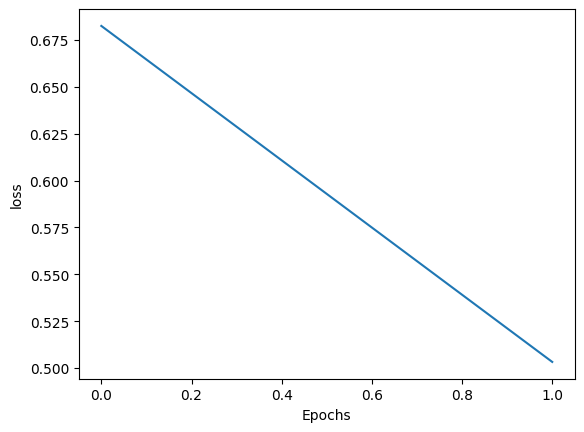

In [20]:
plot_history(history, 'loss')

In [21]:
result = model.evaluate(test_data)
print("Test loss, Test accuracy : ", result)

23/23 [==============================] - 19s 798ms/step - loss: 0.4994 - accuracy: 0.7413
Test loss, Test accuracy :  [0.49943915009498596, 0.7412587404251099]


1/1 [==============================] - 0s 277ms/step


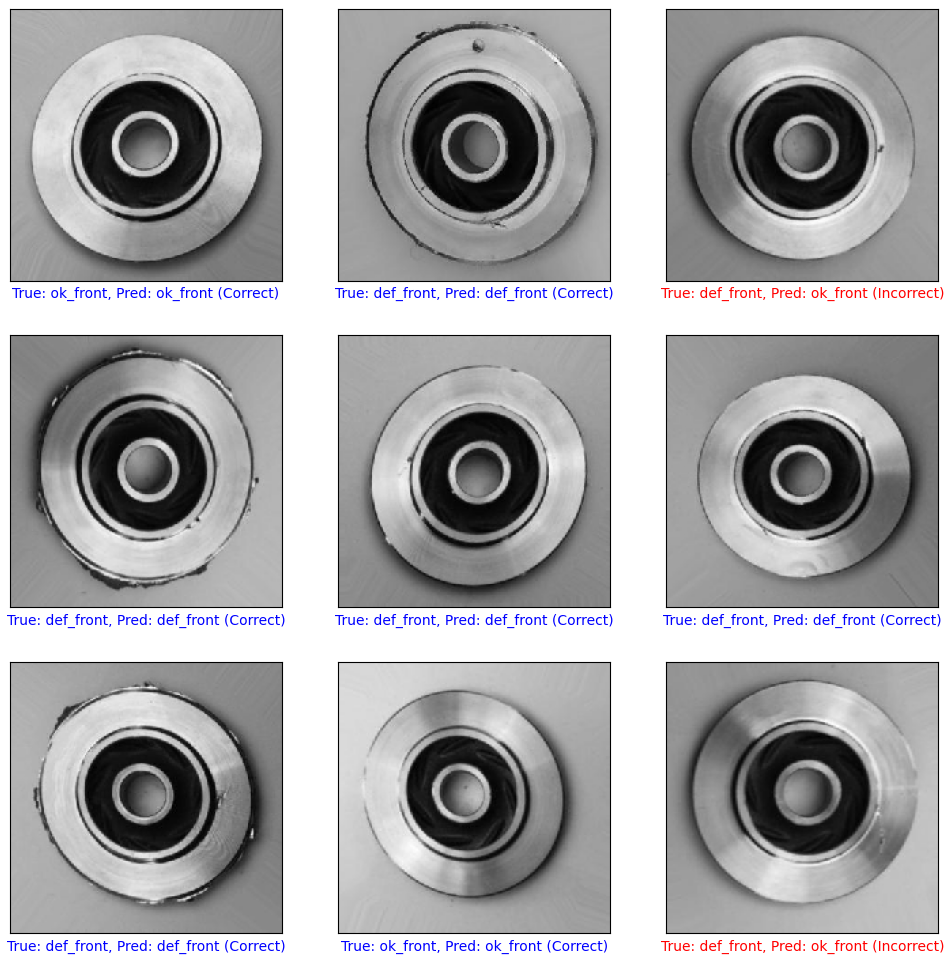

In [22]:
images, labels = next(test_data)

indices = np.random.choice(range(len(images)), size=9)
images = images[indices]
labels = labels[indices]

predictions = model.predict(images)


class_names=list(test_data.class_indices.keys())


plt.figure(figsize=(12,12))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image = images[i]

    if image.shape[-1] == 1:
        image = np.squeeze(image)

    plt.imshow(image)

    predicted_label = np.argmax(predictions[i])

    if predicted_label == np.argmax(labels[i]):
        color='blue'
        result_text="Correct"

    else:
        color='red'
        result_text="Incorrect"

    label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

    plt.xlabel(label_text,color=color)

In [5]:
!pip install streamlit

In [4]:
!pip install streamlit-option-menu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.5 MB/s eta 0:00:00


In [12]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from streamlit_option_menu import option_menu
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


train_dir = "/content/drive/MyDrive/dataset/casting_data/casting_data/train"
test_dir = "/content/drive/MyDrive/dataset/casting_data/casting_data/test"

train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)


test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(200, 200),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle=True)
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

  # Check class names
class_names = train_data.class_indices
class_names = list(class_names.keys())
print(class_names)

def get_sample_image(generator):
    images, labels = next(generator)
    image = images[0]
    label_index = np.argmax(labels[0])
    label_name = class_names[label_index]

    return image, label_name


def sample_images(generator, nrows=3, ncols=3):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

    for i in range(nrows*ncols):
        image, label_name = get_sample_image(generator)
        row = i // ncols
        col = i % ncols
        ax = axes[row][col]
        ax.imshow(image)
        ax.set_title(label_name)
        ax.axis('off')

    plt.show()
# Model layers
model = Sequential([
    Conv2D(32, (2, 2), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(2 ,activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

result = model.evaluate(test_data)
print("Test loss, Test accuracy : ", result)
# import tensorflow as tf
def main():
    st.sidebar.title("Navigation")
    options = st.sidebar.radio("Go to", ["Home", "ML_Model", "Dataset","Output"])

    if options =="Home":
        st.title("Quality Inspection")
        st.write("In the manufacturing industry, reducing processing errors in the manufacturing process is important for maximizing profits. In order to reduce processing errors, it is necessary to secure a budget for quality assurance, implement manual inspection work, and review the manufacturing process. Particularly, the inspection process is carried out by many companies, but there are problems such as uneven accuracy denpending on inspection workers and increased labor costs.")
        st.write("This dataset provides image data of impellers for submersible pumps.")
        # URL of the image
        image_url_1 = "https://static.turbosquid.com/Preview/2020/06/07__08_34_27/11R131.JPGB3B4468C-B515-4E11-92F7-4CA67966DB2BZoom.jpg"
        image_url_2="https://5.imimg.com/data5/WI/KC/MY-6121640/submersible-pump-impeller-500x500.jpg"
        # Display the image
        col1, col2 = st.columns(2)
        col1.image(image_url_1, caption='Image 1', use_column_width=True)
        col2.image(image_url_2, caption='Image 2', use_column_width=True)


    elif options =="ML_Model":
        st.title("ML Model")
    elif options== "Dataset":
        st.title("Dataset")
        st.write("The image data is labeled with ok(normal) and def(defect/anomaly) in advance. In addition, since it is necessary to illuminate the image in a stable condition when acquiring the image, the data was acquired based on a special lighting setting.")
        image_url_3 = "https://www.kaggleusercontent.com/kf/116004849/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..cqenhxYiSbKxwF-rhMDIrQ.YCIdfaph6ycW1rwkEbMWVnzzsDEZXM-4sNkdki0V01a1iOrksG_QnatHMl1o7Us8e2_K9RfJtwqW_U-IxJ9RhhTt6SQQTvevcaamGDcfiJO9v9Lfs-B_Zs6qY7-am65WrlM47RbUXwlPWPbZjRxBR-jCPcp70Kj-Aso1pQPcilLaTIAYlJmodHEMsN1GDG4P0sCBxujtPsUGnfmUDFGhPH7IXA_aQd2odHOgVItmxoS14gOKL18UJmeuetEGgep03_wD2DpqJzXHi1AKHzAOa3kriDIgUbugLW-xc7lCrf1A_BA-1nzmX-hNPXD2a1Yr34CDLti1jmXCzbbh_xNb5AykV4nF9cuVinrTWjh37v7_OZJNrrr_44ce7TUoWAM2DRLvCeSWO9rEMP7WB4wdFtpxIpdpl9k7CNiWUxAk5K0mmVQgEP4VJADcvg2UUQ8T97ILtHlPZ-16DgM9Layy5byz9Uo7LRN5bCnCZyMxDGzMUROo1y2AsBC4TGWqgwoZxWx7pwcS88SyvJJyOX3fDqvv1jpCzDp-1KexEmypvRcXJ1fSEZxlyz71K4sHCJmRqGYRwIQoaiRhWsUMJZodxw1NxANloxss3ew2E-lNzsEOXrMqSdj3sBwU8N_xxY2nc08Djt-UEVGzXocMgi2vBQ2TYq7bWszi1DVBjMkUO5DXDohMPCwXfL39BUyh5m4L.1LgPgyAIa2jg5z7Mj4Z8XQ/__results___files/__results___9_0.png"
        # Display the image
        st.image(image_url_3, caption='Ok  defective', use_column_width=False)
        st.write("This is sample of the dataset")
        dataframe=sample_images(train_data, nrows=3, ncols=3)
        st.set_option('deprecation.showPyplotGlobalUse', False)
        st.pyplot(dataframe)
    elif options == "Output":
        st.title("Output")
        y_true = test_data.classes
        y_pred = model.predict(test_data)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Compute the confusion matrix
        cm = confusion_matrix(y_true, y_pred_classes)

        # Plot the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)

        st.set_option('deprecation.showPyplotGlobalUse', False)
        st.pyplot()
        st.write("Output of the Dataset:")
        images, labels = next(test_data)
        indices = np.random.choice(range(len(images)), size=9)
        images = images[indices]
        labels = labels[indices]

        predictions = model.predict(images)
        class_names=list(test_data.class_indices.keys())


        plt.figure(figsize=(12,12))

        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)

            image = images[i]

            if image.shape[-1] == 1:
                image = np.squeeze(image)

            plt.imshow(image)

            predicted_label = np.argmax(predictions[i])

            if predicted_label == np.argmax(labels[i]):
                color='blue'
                result_text="Correct"

            else:
                color='red'
                result_text="Incorrect"

            label_text="True: "+ class_names[np.argmax(labels[i])] + ", Pred: " + class_names[predicted_label] + f" ({result_text})"

            plt.xlabel(label_text,color=color)
            st.pyplot(plt)

if __name__ == "__main__":
    main()

Overwriting app.py


In [26]:
y_true = test_data.classes
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)

        # Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

        # Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

st.set_option('deprecation.showPyplotGlobalUse', False)
st.pyplot()

23/23 [==============================] - 42s 2s/step


NameError: name 'confusion_matrix' is not defined

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.112.224:8501

your url is: https://metal-cycles-beam.loca.lt
2024-07-23 05:25:31.315691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 05:25:31.315767: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 05:25:31.317800: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-23 05:25:31.329646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU ins